In [14]:
# Add your imports here
# import datetime
# import pandas as pd
# import numpy as np
# import scipy as sp
# import matplotlib.pyplot as plt
# import seaborn as sns
# from pyspark.sql import *
# import pyspark.sql.functions as F
# from pyspark.sql.types import FloatType
# spark = SparkSession.builder.getOrCreate()
from sklearn.feature_extraction.text import CountVectorizer
import csv
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
with open('actors_co-occurences.csv', newline='') as csvfile:
    data = list(csv.reader(csvfile))
    
docs = ['this;this;this;book',
        'this;cat;good',
        'cat;good;shit']
count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs.split())
# X[X > 0] = 1 # run this line if you don't want extra within-text cooccurence (see below)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
print(Xc.todense()) # print out matrix in dense format
print(count_model.get_feature_names())

In [8]:
docs = ['this this this book',
        'this cat good',
        'cat good shit']
count_model = CountVectorizer(ngram_range=(1,1)) # default unigram model
X = count_model.fit_transform(docs)
# X[X > 0] = 1 # run this line if you don't want extra within-text cooccurence (see below)
Xc = (X.T * X) # this is co-occurrence matrix in sparse csr format
Xc.setdiag(0) # sometimes you want to fill same word cooccurence to 0
Xc_dense = Xc.todense()
print(Xc_dense) # print out matrix in dense format
print(count_model.get_feature_names())

[[0 0 0 0 3]
 [0 0 2 1 1]
 [0 2 0 1 1]
 [0 1 1 0 0]
 [3 1 1 0 0]]
['book', 'cat', 'good', 'shit', 'this']


In [11]:
A=np.matrix(Xc_dense)
G=nx.from_numpy_matrix(A)

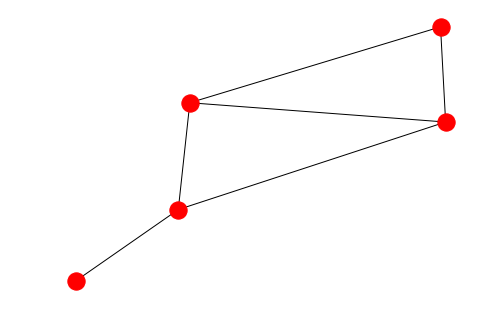

In [15]:
nx.draw(G)
plt.show()